# Actionable Insights from Lululemon Reviews - Topic Interpretation and Exploration

Amanda Cheney  
Metis Project 4  
Part 3 of 4    
November 13, 2020  

**Objective**

Natural language processing & unsupervised learning exploration of customer reviews of lululemon’s best-selling sports bras to derive actionable insights for product development and management team.

**Data Sources**   
9,000+ reviews of all 13 of Lululemon's bestselling sports bras, collected using Selenium.

**This Notebook**  
Interprets and gives labels to 6 core topics selected using TFIDF and NMF in the previous notebook.
1. expectations vs experience  
2. size/fit  
3. support  
4. style/design   
5. comfort  
6. performance  

Explores how the frequency of topics differs between products, change over time and manifest differently in positive vs negative reviews.  

Exports final dataframe to CSV and tests review **recommender** function for use in Streamlit app - Lululemon Review Curator. 

## Imports

In [1]:
import pandas as pd
import numpy as np
import pickle
import re 

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Avoid warnings
import warnings
warnings.filterwarnings("ignore")

import scattertext as st
from sklearn.metrics.pairwise import cosine_similarity
import heapq

## Load Data

In [2]:
with open('final_df.pickle', 'rb') as read_file:
    final_df = pickle.load(read_file)

In [3]:
with open('word_topic_matrix.pickle', 'rb') as read_file:
    word_topic_matrix = pickle.load(read_file)

## Topic Interpretation

#### Interpreting Topic 1

Recall from previous notebook that topic 0 was the least interpretable of the final 6 topics, kind of mishmash of words, so let's save topic 0 until we've worked through some of the easier cases and start with topic 1.

In [4]:
word_topic_matrix.sort_values(by='topic_1', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
size,0.000000,2.614062,0.000000,0.000000,0.000000,0.000000
order,0.000000,0.724042,0.000000,0.028072,0.000000,0.045086
small,0.110631,0.714017,0.003548,0.000000,0.050040,0.000000
tight,0.117467,0.709934,0.000000,0.000000,0.000000,0.094624
buy,0.841849,0.295930,0.000000,0.074737,0.078222,0.031023
cup,0.381222,0.285121,0.093595,0.000000,0.011947,0.054279
band,0.364311,0.261514,0.000000,0.000000,0.000000,0.000000
return,0.090369,0.251158,0.000000,0.000000,0.000000,0.000000
big,0.210580,0.248684,0.023995,0.000000,0.000000,0.010861
little,0.454582,0.243673,0.071828,0.000000,0.010148,0.000000


In [5]:
one = final_df[final_df['NMF_Topic']==1]
print(one.rev_length.mean())
one.head()

360.5283630470016


,index,product_name,product_url,product_list_price,product_avg_rating,title,content,rating,name,date,...,num_total_ratings,rev_length,clean_txt,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
13,13,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,"It’s the first of its kind, but size up!",This is one of my favorite bras that lululemon...,5,Acn327,2020-10-24,...,89,278,favorite lululemon like accommodate large cup ...,1,0.016909,0.090358,0.011846,0.000462,0.029855,0.000000
20,20,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Color is gorgeous; fit is a little off,I LOOOOVE this light pink color for bras. I bo...,3,jackie3495,2020-10-22,...,89,274,loooove light pink color buy usual size feel l...,1,0.037170,0.049019,0.000000,0.032552,0.003335,0.029029
31,31,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,My favorite sports bra ever,This has to be the best sports bra I've ever w...,5,MamaULove7,2020-10-16,...,89,434,wear brand size support level truly feel like ...,1,0.043008,0.055753,0.016941,0.014395,0.024081,0.010589
32,32,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Maybe the perfect bra,This bra is so soft and comfy it’s honestly sh...,5,GruChamp31,2020-10-15,...,89,516,soft comfy honestly shock love braless thing c...,1,0.023852,0.052661,0.000000,0.023903,0.031471,0.030263
35,35,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Super Comfy,I love it for lounging/low-impact activities. ...,5,lululemonlaner,2020-10-14,...,89,194,love lounginglowimpact activity usually size l...,1,0.000000,0.103161,0.000000,0.049444,0.098237,0.016980


From the word topic matrix as well as a review of the original review texts, it looks pretty clear that topic 1 may be appropriately called "size/fit".

#### Interpreting Topic 2

In [6]:
word_topic_matrix.sort_values(by='topic_2', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
great,0.000000,0.000000,2.508834,0.000000,0.000000,0.000000
support,0.205457,0.000000,1.823708,0.089640,0.000000,0.000000
run,0.451256,0.159296,0.499232,0.000000,0.408241,0.000000
provide,0.101257,0.000000,0.367429,0.000000,0.017241,0.000000
look,0.522805,0.013003,0.305653,0.136411,0.000000,0.114020
high,0.395707,0.000000,0.295011,0.000000,0.032151,0.000000
workout,0.340390,0.000000,0.290860,0.037935,0.225302,0.000000
coverage,0.207372,0.023834,0.242738,0.090120,0.004474,0.029446
yoga,0.452435,0.000000,0.211476,0.008781,0.127867,0.000000
need,0.265545,0.097459,0.186112,0.046063,0.014058,0.000000


In [7]:
one = final_df[final_df['NMF_Topic']==2]
print(one.rev_length.mean())
one.head()

223.56009811937858


,index,product_name,product_url,product_list_price,product_avg_rating,title,content,rating,name,date,...,num_total_ratings,rev_length,clean_txt,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
46,46,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,So so comfy!! Great every day bra.,"I saw reviews about it running small, however ...",5,Lululover_WA,2020-10-09,...,89,610,review run small find true size fit great size...,2,0.044902,0.057428,0.065288,0.011643,0.031294,0.017901
64,64,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Arsini,Great support but feels like you are warring n...,5,Anonymous,2020-09-26,...,89,53,great support feel like war,2,0.035556,0.000000,0.186082,0.000000,0.000000,0.002660
73,73,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,So soft!!,Sooo soft and comfy. I wear it to dance class ...,5,Jqnsiwnaiznd,2020-09-24,...,89,135,sooo soft comfy wear dance class spin class pe...,2,0.021517,0.000000,0.029041,0.013217,0.024573,0.013559
81,81,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Better than expected!,My initial concerns re: unadjustable straps we...,4,TravelingQuinn,2020-09-16,...,89,376,initial concern unadjustable strap easily over...,2,0.041943,0.000000,0.072162,0.000000,0.009567,0.026071
101,12,"Energy Bra Medium Support, B–D Cup",https://shop.lululemon.com/p/women-sports-bras...,52.0,4.1,Pretty and Effective,"Great bra, everything stay is place, but you s...",5,Anonymous,2020-10-26,...,3069,75,great stay place cute strappy look,2,0.000000,0.005155,0.030369,0.000524,0.070698,0.030638


From the word topic matrix as well as a review of the original review texts, it seems like reviews classified as topic 2 are generally concerned with "support".

#### Interpreting Topic 3

In [8]:
word_topic_matrix.sort_values(by='topic_3', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
love,0.000000,0.000000,0.000000,2.743513,0.000000,0.000000
color,0.000000,0.005303,0.000000,1.455267,0.000000,0.000000
absolutely,0.037562,0.000000,0.000000,0.360879,0.039375,0.000000
energy,0.486751,0.124646,0.000000,0.305739,0.000000,0.000000
perfect,0.000000,0.000000,0.000000,0.257704,0.110225,0.972398
different,0.130639,0.064087,0.000000,0.216220,0.000000,0.000000
style,0.197434,0.096969,0.057139,0.200577,0.000000,0.031443
design,0.123216,0.038926,0.037366,0.191311,0.040518,0.000000
favorite,0.102992,0.000000,0.184105,0.169500,0.236374,0.000000
cute,0.114860,0.054197,0.087113,0.155759,0.776142,0.006910


In [9]:
one = final_df[final_df['NMF_Topic']==3]
print(one.rev_length.mean())
one.head()

240.82756024096386


,index,product_name,product_url,product_list_price,product_avg_rating,title,content,rating,name,date,...,num_total_ratings,rev_length,clean_txt,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
0,0,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Haven't taken it off,I purchased this bra in the hazy jade color ab...,5,Anonymous,2020-10-31,...,89,203,purchase hazy jade color week ago wear everyda...,3,0.044743,0.000000,0.000000,0.070534,0.000000,0.000000
6,6,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Best bra for yoga,"Love this bra. So comfortable, please make mor...",5,Anonymous,2020-10-28,...,89,55,love comfortable color,3,0.000000,0.000000,0.000000,0.203511,0.133983,0.000000
14,14,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,the best!,simply the best....better than all the rest *i...,5,gogogreenbay,2020-10-24,...,89,229,simply bestbetter rest insert music note bee k...,3,0.004312,0.003522,0.000678,0.024602,0.001589,0.000000
25,25,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Perfection,"Please, please, please make more colors and ne...",5,Melissa in Denver,2020-10-20,...,89,260,color stop buy work work pediatric operate roo...,3,0.027604,0.000000,0.028291,0.108080,0.001357,0.015159
36,36,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Almost 5 stars!!,The fabric is amazing...and I love that the pa...,4,Anonymous,2020-10-14,...,89,268,fabric amazingand love pad stay simple strap p...,3,0.050744,0.009384,0.000000,0.060327,0.002757,0.000000


From the word topic matrix as well as a review of the original review texts, it seems like reviews classified as topic 3 are generally concerned with "style/design" with many of them discussing color and fabric.

#### Interpreting Topic 4

In [10]:
word_topic_matrix.sort_values(by='topic_4', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
comfortable,0.000000,0.000000,0.000000,0.000000,2.198008,0.000000
supportive,0.002158,0.000000,0.000000,0.000000,1.297329,0.000000
super,0.000000,0.074574,0.002529,0.052485,0.998117,0.000000
cute,0.114860,0.054197,0.087113,0.155759,0.776142,0.006910
run,0.451256,0.159296,0.499232,0.000000,0.408241,0.000000
soft,0.000000,0.020643,0.000000,0.099395,0.382336,0.019916
wear,1.745169,0.077021,0.000000,0.000000,0.266860,0.000000
favorite,0.102992,0.000000,0.184105,0.169500,0.236374,0.000000
workout,0.340390,0.000000,0.290860,0.037935,0.225302,0.000000
flatter,0.074642,0.008164,0.000000,0.067365,0.223982,0.078074


In [11]:
one = final_df[final_df['NMF_Topic']==4]
print(one.rev_length.mean())
one.head()

210.33641975308643


,index,product_name,product_url,product_list_price,product_avg_rating,title,content,rating,name,date,...,num_total_ratings,rev_length,clean_txt,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
1,1,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,"comfortable, but...","comfortable, but not for small frame/big chest...",3,Ashley Traister,2020-10-31,...,89,107,comfortable small framebig chest strap dig sho...,4,0.051651,0.020673,0.000000,0.000000,0.065041,0.000000
3,3,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Comfort Bra 5*’s,Super soft and comfortable to wear all day. Ot...,5,Craftybayler,2020-10-30,...,89,111,super soft comfortable wear day rub tight wear...,4,0.038130,0.008928,0.000000,0.000000,0.107020,0.000000
10,10,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Fits great but it,I bought the light pink and the coppertone col...,3,Anonymous,2020-10-26,...,89,365,buy light pink coppertone color like fit great...,4,0.038758,0.033309,0.022235,0.018753,0.048275,0.022195
11,11,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Like a cloud!,"Seriously, like a cloud! This bra is so comfor...",5,Anonymous,2020-10-25,...,89,71,seriously like cloud comfortable sleep,4,0.009506,0.000000,0.000000,0.000000,0.049667,0.000451
12,12,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Super Comfortable,This bra is super comfortable. Usually by the ...,5,Anonymous,2020-10-25,...,89,167,super comfortable usually end day hardly wait ...,4,0.000000,0.005155,0.030369,0.000524,0.070698,0.030638


From the word topic matrix as well as a review of the original review texts, it seems pretty clear that reviews classified as topic 4 are generally concerned with "comfort".

#### Interpreting Topic 5

In [12]:
word_topic_matrix.sort_values(by='topic_5', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
fit,0.000000,0.028485,0.000000,0.000000,0.000000,2.874787
good,0.324078,0.000000,0.112287,0.000000,0.057120,1.260558
perfect,0.000000,0.000000,0.000000,0.257704,0.110225,0.972398
perfectly,0.000000,0.003198,0.000000,0.000000,0.015316,0.711224
find,0.459983,0.055432,0.000000,0.000000,0.106851,0.199037
like,1.126189,0.035894,0.000000,0.000000,0.000000,0.181779
nice,0.169300,0.024552,0.046913,0.000000,0.019023,0.128158
look,0.522805,0.013003,0.305653,0.136411,0.000000,0.114020
hold,0.353756,0.000000,0.031892,0.000000,0.107419,0.103984
snug,0.102915,0.117736,0.000000,0.000000,0.000000,0.102243


In [13]:
one = final_df[final_df['NMF_Topic']==5]
print(one.rev_length.mean())
one.head()

238.9711055276382


,index,product_name,product_url,product_list_price,product_avg_rating,title,content,rating,name,date,...,num_total_ratings,rev_length,clean_txt,NMF_Topic,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
16,16,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Almost perfect,"The fit, material, almost everything about thi...",2,DianaBecker,2020-10-24,...,89,208,fit material incredible try notice cup crease ...,5,0.024850,0.004957,0.0,0.000000,0.000000,0.035446
17,17,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Comfortable perfect fit,I was happy to find this bra is as comfortable...,5,RPhappy510,2020-10-24,...,89,341,happy find comfortable review suggest importan...,5,0.034189,0.031938,0.0,0.000000,0.031268,0.034730
24,24,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Great but...,"This bra is soft, fits really well and I love ...",4,Deckedinlulu,2020-10-20,...,89,379,soft fit good love build pad wash good complai...,5,0.019908,0.000000,0.0,0.029181,0.000784,0.036872
69,69,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,Comfort,Fits like a glove could wear to sleep it’s so ...,5,Anonymous,2020-09-25,...,89,51,fit like glove wear sleep comfy,5,0.028848,0.000000,0.0,0.000000,0.006211,0.052210
75,75,"Like a Cloud Bra Light Support, B/C Cup",https://shop.lululemon.com/p/women-sports-bras...,58.0,4.6,i'm not wearing a bra,It just came it today and this bra feels like ...,5,meg92444842,2020-09-23,...,89,295,come today feel like wear sooooooo comfy retur...,5,0.039771,0.002444,0.0,0.008841,0.005248,0.047725


From the word topic matrix as well as a review of the original review texts, it looks like reviews classified as topic 5 are generally concerned with product quality, durability and usage, which I would describe collectively as "performance". 

#### Interpreting Topic 0

Saving the trickiest for last, recall from previous notebook that topic 0 was the least interpretable of the final 6 topics, kind of mishmash of words so finding the coherence of this topic may take some more effort than was the case for all the others.

In [14]:
word_topic_matrix.sort_values(by='topic_0', ascending=False)[0:10]

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
wear,1.745169,0.077021,0.000000,0.000000,0.266860,0.000000
like,1.126189,0.035894,0.000000,0.000000,0.000000,0.181779
strap,0.964705,0.000000,0.053116,0.048205,0.062635,0.000000
buy,0.841849,0.295930,0.000000,0.074737,0.078222,0.031023
long,0.715819,0.000000,0.000000,0.109068,0.000000,0.000000
feel,0.715658,0.043162,0.089355,0.067817,0.061845,0.076290
time,0.694323,0.000000,0.000000,0.000000,0.021824,0.000000
stretch,0.532128,0.000000,0.000000,0.000000,0.000000,0.000000
look,0.522805,0.013003,0.305653,0.136411,0.000000,0.114020
work,0.515581,0.020198,0.088468,0.000000,0.124915,0.075374


In [15]:
one = final_df[final_df['NMF_Topic']==0]
print(one.rev_length.mean())
print(one.content.head(20))

432.89368258859787
2     If it weren't for the price, I would replace a...
4     I originally bought 2 but I’m buying more. I w...
5     This bra is super comfortable. I didn’t buy it...
7     I think I’m going to buy this in every color. ...
8     Tried it on and loved how soft it is but after...
9     I bought this bra a month ago and loved it so ...
15    Just wore mine for the first time yesterday an...
18    Bought this as a do anything bra, but had to e...
19    Omg this fabric is like a dream come true! I h...
21    It came in fast. I wear it to work out and it ...
26    I rarely wear bras and if i do, they are suuup...
27    When I tried this bra in the store, it was ver...
29    This is exactly the cute and comfortable bra I...
30    This is by far the most comfortable bra I have...
33    Finally a LL sports bra that doesn't suffocate...
38    This IS the bra I’m looking for! It’s soooooo ...
42    I've been bra searching for a long time to sui...
45    I have been wearing lul

In [16]:
one.content.tail(15)

9047    This is the first sports bra that I get excite...
9051    The Enlite Bra Weave is amazing. There are ver...
9054    It's so hard to find a sports bra that is cute...
9058    I read really great reviews about this bra so ...
9061    Cheers to the LuLu team for putting attractive...
9062    This is the best running bra of all time but t...
9064    I saw a couple other reviews saying the same t...
9067    Very comfortable straps. I bought a 36D, wish ...
9068    I bought this new Enlite style because I am a ...
9071    I bought this at the suggestion of a sales ass...
9072    High school and college athlete here and now a...
9077    was psyched about this super soft bra. How do ...
9078    I have other Enlite bras- love them. Thus, I g...
9085    I have found it so difficult to find a decent,...
9087    I'm a huge fan of the Enlite Bra: it holds the...
Name: content, dtype: object

After looking at these different segements of the topic 0 sub-data set, it seems that what these reviews have in common exists on a different level of abstraction than the others (they are also the longest reviews on average, with the reviewers providing more information, such that perhaps there are so many details that their commonality can only exist when abstracted). In general these review are describing not only their product experiences, but what things they wish were different about the product as well as how the product differs from other products they have interacted with in the past. Therefore, I will label this topic as "expectations vs experience"

**Final Topics**  
0: expectations vs experience  
1: size/fit  
2: support  
3: style/design   
4: comfort  
5: performance   

In [17]:
equiv = {0: 'expectations vs experience',  
1: 'size/fit',  
2: 'support',  
3: 'style/design',   
4: 'comfort',  
5: 'performance'    
}
final_df['labels'] = final_df['NMF_Topic'].map(equiv)

Now let's have a look at how thse topics hang together in the t-SNE visualization I made in the previous notebook.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


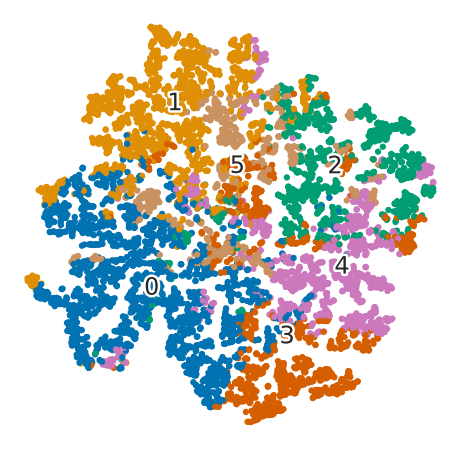

In [18]:
with open('tsne_fig.pickle', 'rb') as read_file:
    tsne_fig = pickle.load(read_file)

It makes since that 1: size/fit, 2: support, and 4: comfort are not really intermingled with other topics while 0: expectations vs experience intermingles a bit with 5: performance as well as 3: style/design since many of the reviews categorized as 0: expectations vs experience discussed how their expectations of the product implicated the percieved trade-off between performance and style.  
Likewise it makes sense that overall the topics, while separable, are close to one another because my corpus is so narrowly defined and all pertaining to the same general thing, i.e. different varieties of sports bras.

# Topic Frequency

findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Trebuchet MS Bold'] not found. Falling back to DejaVu Sans.


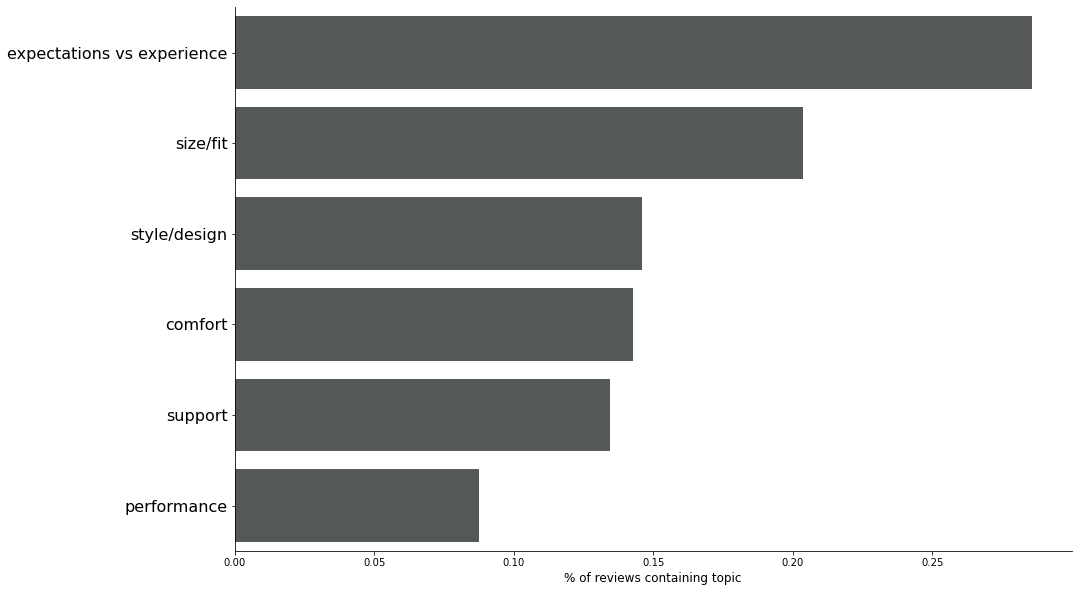

In [19]:
t_font = {'fontname':'Trebuchet MS Bold'}
emphasize = ['comfort']
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=final_df['labels'].value_counts().index, 
            x=final_df['labels'].value_counts(normalize=True, ascending=False), 
            data=final_df, orient='h', 
            color='#545859',saturation=1
           )
plt.xlabel('% of reviews containing topic', fontsize=12, **t_font)
# plt.ylabel(fontsize=12, **t_font)

sns.despine();

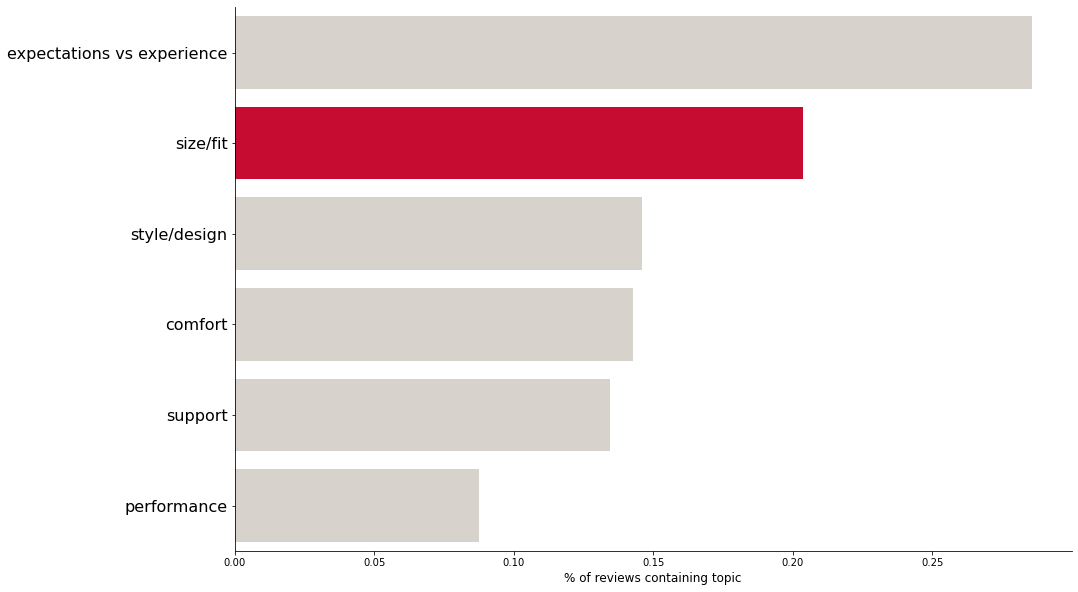

In [20]:
t_font = {'fontname':'Trebuchet MS Bold'}
emphasize = ['size/fit']
plt.figure(figsize=(15,10))
plt.yticks(**t_font, size=16) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=final_df['labels'].value_counts().index, 
            x=final_df['labels'].value_counts(normalize=True, ascending=False), 
            data=final_df, orient='h', 
            palette=['#C60C30' if y in emphasize else '#d7d2cb' for y in 
            final_df['labels'].value_counts().index], saturation=1
           )
plt.xlabel('% of reviews containing topic', fontsize=12, **t_font)
sns.despine();

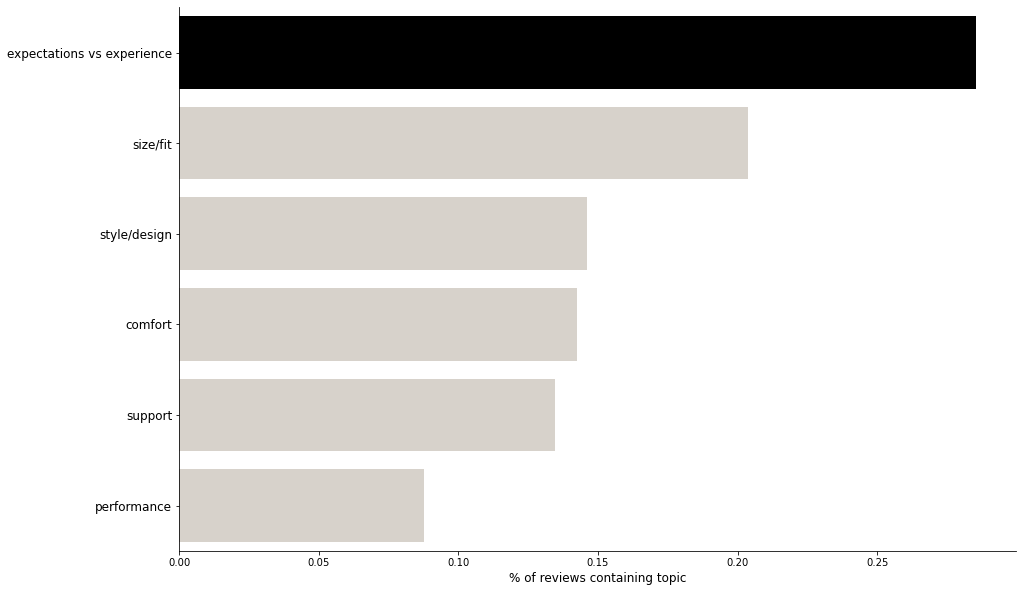

In [21]:
t_font = {'fontname':'Trebuchet MS Bold'}
emphasize = ['expectations vs experience']
plt.figure(figsize=(15,10))
plt.yticks(**t_font) 
plt.xticks(**t_font) 
plt.rc('ytick', labelsize=12) 
sns.barplot(y=final_df['labels'].value_counts().index, 
            x=final_df['labels'].value_counts(normalize=True, ascending=False), 
            data=final_df, orient='h', 
            palette=['black' if y in emphasize else '#d7d2cb' for y in 
            final_df['labels'].value_counts().index], saturation=1
           )
plt.xlabel('% of reviews containing topic', fontsize=12, **t_font)
sns.despine();

#  Topics by product

In [22]:
for product in final_df.product_name.unique():
    product = final_df[final_df.product_name == product]
    name = product.product_name.unique()[0]
    vals = product.labels.value_counts(normalize=True)[0:3]
    print(name)
    print(round(vals, 2))
    print("\n")

Like a Cloud Bra Light Support, B/C Cup
comfort                       0.33
expectations vs experience    0.26
size/fit                      0.17
Name: labels, dtype: float64


Energy Bra Medium Support, B–D Cup
expectations vs experience    0.27
size/fit                      0.22
style/design                  0.15
Name: labels, dtype: float64


Free To Be Bra Wild Light Support, A/B Cup
expectations vs experience    0.28
size/fit                      0.22
style/design                  0.19
Name: labels, dtype: float64


Invigorate Bra Long Line Medium Support, B/C Cup
expectations vs experience    0.28
size/fit                      0.23
style/design                  0.19
Name: labels, dtype: float64


Flow Y Bra Nulu Light Support, B/C Cup
expectations vs experience    0.27
size/fit                      0.22
comfort                       0.17
Name: labels, dtype: float64


Ebb to Street Bra Light Support, C/D Cup
expectations vs experience    0.29
size/fit                      0.20
sty

Here I pull out a single review that I took a screenshot of from the website to incorporate into the conclusion of my presentation.

In [23]:
print(final_df[final_df['title']=='Tight lower band'].content)
print(final_df[final_df['title']=='Tight lower band'].labels)

335    I bought two energy bra in the past and they b...
Name: content, dtype: object
335    size/fit
Name: labels, dtype: object


# Topics by sentiment: positive vs negative reviews

In [24]:
filtered = final_df[final_df.rating!=3]
# Set 4/5 star reviews to positive, the rest to negative
filtered['sentiment'] = np.where(filtered['rating'] >= 4, 'positive', 'negative')

In [25]:
pos = filtered[filtered['sentiment']=='positive']
neg = filtered[filtered['sentiment']=='negative']

Create multiple versions of same graphs for use in presentation. 

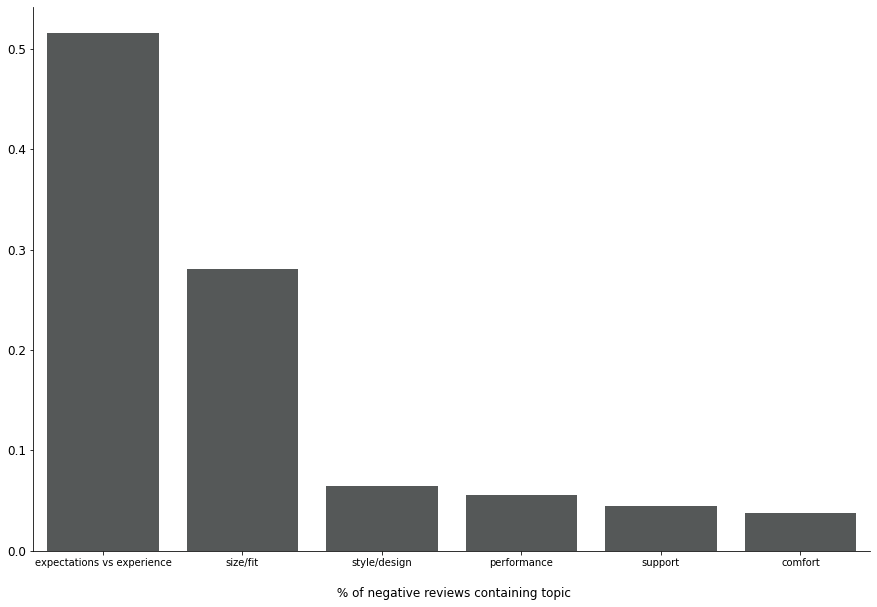

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x=neg['labels'].value_counts().index, y= (neg['labels'].value_counts(normalize=True)), data=neg,  palette=['#545859'])
plt.xlabel('\n % of negative reviews containing topic', fontsize=12, **t_font)
plt.ylabel(None)
sns.despine();

In [27]:
order_in_neg = ['performance', 'size/fit', 'expectations vs experience', 'style/design', 'support', 'comfort']

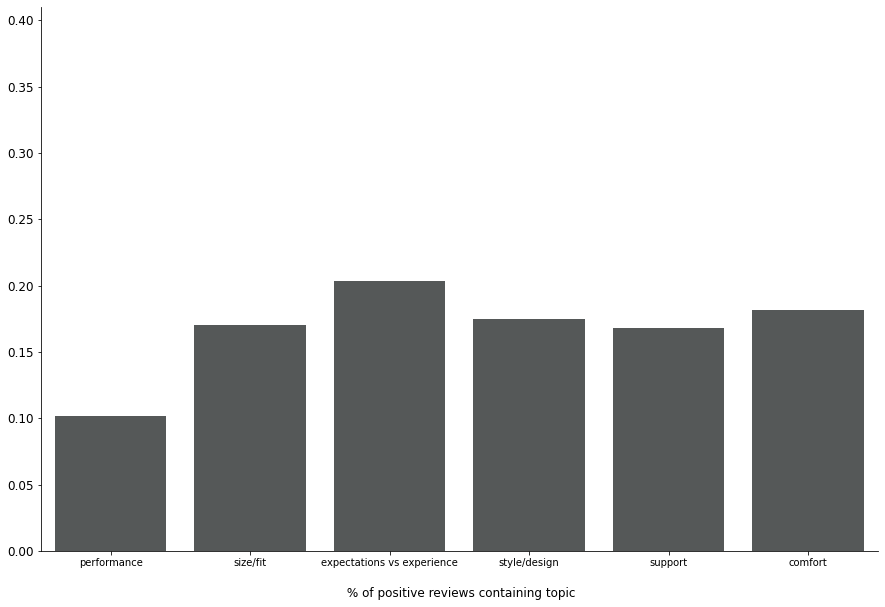

In [28]:
plt.figure(figsize=(15,10))
plt.ylim(0, .41)
sns.barplot(x=pos['labels'].value_counts().index, y= (pos['labels'].value_counts(normalize=True)), data=pos,  order = order_in_neg, palette=['#545859'])
plt.xlabel('\n % of positive reviews containing topic', fontsize=12, **t_font)
plt.ylabel(None)
sns.despine();

Looking at how the six topics are distributed across negative vs positive reviews, we see that among positive reviews the six topics have pretty even distributions, however, the negative data is much more skewed. Particularly striking is the fact that while performance is by far the most common topic in negative reviews, it is actually the least common topic in positive reviews - a point which I emphasize in my presentation using the two plots below.

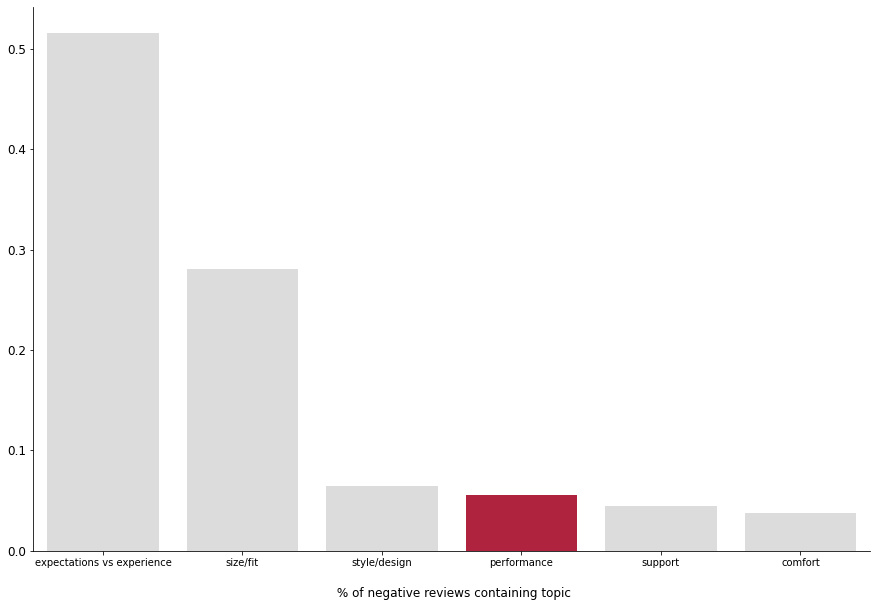

In [29]:
emphasize = ['performance']
plt.figure(figsize=(15,10))
sns.barplot(x=neg['labels'].value_counts().index, y= (neg['labels'].value_counts(normalize=True)), data=neg,  palette=['#C60C30' if y in emphasize else 'gainsboro' for y in neg['labels'].value_counts().index])
plt.xlabel('\n % of negative reviews containing topic', fontsize=12, **t_font)
plt.ylabel(None)
sns.despine();

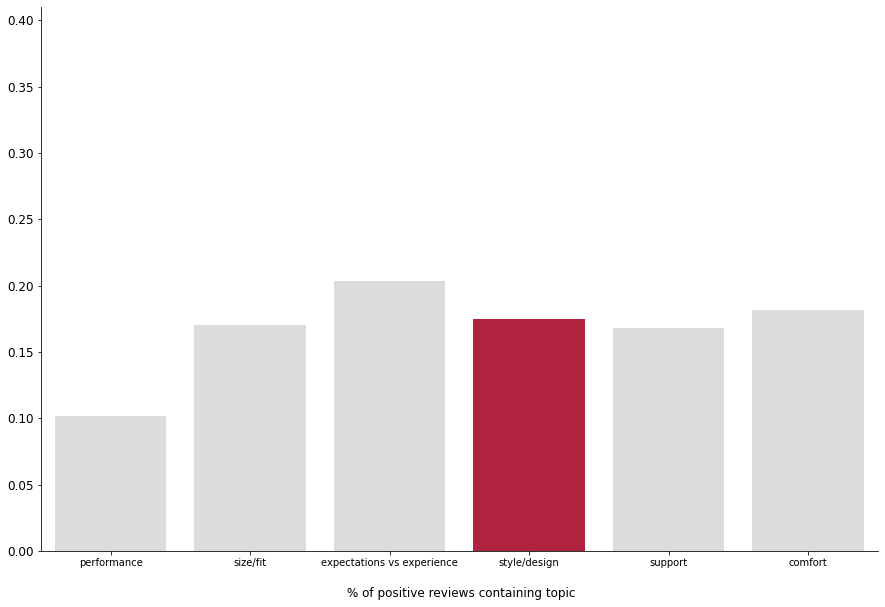

In [30]:
emphasize = ['performance']
plt.figure(figsize=(15,10))
plt.ylim(0, .41)
sns.barplot(x=pos['labels'].value_counts().index, y=pos['labels'].value_counts(normalize=True), data=pos, order = order_in_neg,  palette=['#C60C30' if y in emphasize else 'gainsboro' for y in neg['labels'].value_counts().index])
plt.xlabel('\n % of positive reviews containing topic', fontsize=12, **t_font)
plt.ylabel(None)
sns.despine();

Let's have a look at how the language used in postive vs negative reviews compare at a high level using Scattertext.

In [31]:
ts = final_df[final_df.rating!=3]

# Set 4/5 star reviews to positive, the rest to negative
ts['sentiment'] = np.where(ts['rating'] >= 4, 'positive', 'negative')

# Include only the sentiment and reviews columns
ts = ts[['sentiment', 'clean_txt']]

In [32]:
corpus = st.CorpusFromPandas(ts,
                             category_col='sentiment',
                             text_col='clean_txt',
                             nlp=st.whitespace_nlp_with_sentences
                            ).build()

In [33]:
html = st.produce_scattertext_explorer(
        corpus,
        category='positive',
        category_name='Positive Reveiws',
        not_category_name='Negative Reviews',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        save_svg_button=True
        )

In [34]:
open('words_by_sentiment.html', 'wb').write(html.encode('utf-8'));

# Topics over time

In [35]:
final_df['month'] = final_df['date'].dt.strftime('%Y-%m')

In [36]:
date_freq = final_df.groupby(['month', 'NMF_Topic']).size().unstack().reset_index()

In [37]:
date_freq.fillna(0, inplace=True)
date_freq['total'] = date_freq.sum(axis=1)

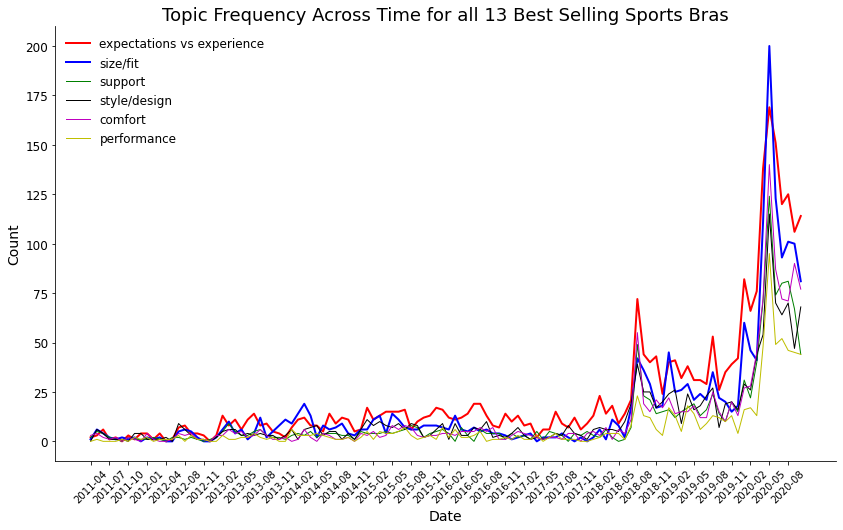

In [38]:
dates = date_freq.month
x_ticks = list(date_freq.month.unique()[::3])

zero = date_freq[0]
one = date_freq[1]
two = date_freq[2]
three = date_freq[3]
four = date_freq[4]
five = date_freq[5]

plt.figure(figsize=(14, 8))
plt.plot(dates, zero, color='r', linewidth=2, label='expectations vs experience')
plt.plot(dates, one, color='b', linewidth=2, label='size/fit')
plt.plot(dates, two, color='g', linewidth=1, label='support')
plt.plot(dates, three, color='0', linewidth=1, label='style/design')
plt.plot(dates, four, color='m', linewidth=1, label='comfort')
plt.plot(dates, five, color='y', linewidth=1, label='performance')

plt.title('Topic Frequency Across Time for all 13 Best Selling Sports Bras', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='upper left', frameon=False, fontsize=12)
sns.despine()
#plt.savefig('../img/top_freq_timeseries.png');

# Topics over time for a single product

In [39]:
energy = final_df[final_df.product_name == 'Energy Bra Medium Support, B–D Cup']

In [40]:
energy_freq = energy.groupby(['month', 'NMF_Topic']).size().unstack().reset_index()

In [41]:
energy_freq.fillna(0, inplace=True)
energy_freq['total'] = energy_freq.sum(axis=1)

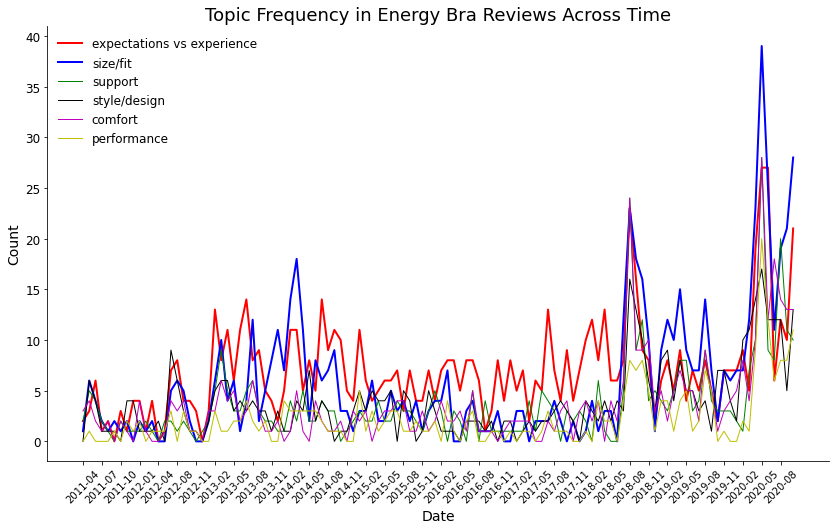

In [42]:
dates = energy_freq.month
x_ticks = list(energy_freq.month.unique()[::3])

zero = energy_freq[0]
one = energy_freq[1]
two = energy_freq[2]
three = energy_freq[3]
four = energy_freq[4]
five = energy_freq[5]

plt.figure(figsize=(14, 8))
plt.plot(dates, zero, color='r', linewidth=2, label='expectations vs experience')
plt.plot(dates, one, color='b', linewidth=2, label='size/fit')
plt.plot(dates, two, color='g', linewidth=1, label='support')
plt.plot(dates, three, color='0', linewidth=1, label='style/design')
plt.plot(dates, four, color='m', linewidth=1, label='comfort')
plt.plot(dates, five, color='y', linewidth=1, label='performance')

plt.title('Topic Frequency in Energy Bra Reviews Across Time', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(x_ticks, rotation=45)
plt.legend(loc='upper left', frameon=False, fontsize=12)
sns.despine();

# Recommender for Streamlit App - Lululemon Review Curator

In [43]:
final_df.to_csv(r'df.csv')

In [44]:
final_df['product_name'].unique()

array(['Like a Cloud Bra Light Support, B/C Cup',
       'Energy Bra Medium Support, B–D Cup',
       'Free To Be Bra Wild Light Support, A/B Cup',
       'Invigorate Bra Long Line Medium Support, B/C Cup',
       'Flow Y Bra Nulu Light Support, B/C Cup',
       'Ebb to Street Bra Light Support, C/D Cup',
       'Enlite Bra Zip Front High Support, A–E Cups',
       'Energy Bra Long Line Medium Support, B–D Cup',
       'Ebb To Street Bra Light Support, A/B Cup',
       'Run Times Bra High Support, B–E Cups',
       'Energy Bra High Neck Medium Support, B–D Cup',
       'Free To Be Serene Bra Long Line Light Support, C/D Cup Online Only',
       'Enlite Bra Weave High Support, A–E Cup Online Only'], dtype=object)

In [45]:
from recommender import Review_Recommender

Let's confirm that the review recommender is working as intended, entering a couple different products, different combinations of produt needs and printing out product names to make sure that we are only seeing the products we requested.

In [46]:
Review_Recommender(final_df, product='Free To Be Serene Bra Long Line Light Support, C/D Cup Online Only', num=3, exp=1, size=1, support=1, style=1, comfort=1, performance=1)

(['Beautiful top! great fit! I first felt little tight, but after wearing couple of times, it was good fit. material is so soft, and comfortable to do workout at home, and pilates as well! great shape and I would like to have all different colours!',
  'I love the long line bra paired with a high waist legging. Just a little skin peaks thru but not to much. This bra is very comfortable and true to size with great support for pilates',
  'Great quality and super cute! Love that it has a band higher in the bra for better support. Love as always!'],
 ['Free To Be Serene Bra Long Line Light Support, C/D Cup Online Only',
  'Free To Be Serene Bra Long Line Light Support, C/D Cup Online Only',
  'Free To Be Serene Bra Long Line Light Support, C/D Cup Online Only'])

In [47]:
Review_Recommender(final_df, product='Ebb To Street Bra Light Support, A/B Cup', num=10, exp=2, size=1, support=1, style=2, comfort=5, performance=1)

(["definitely fits better for smaller chested folks. i'm usually a size 8-10 in lulu tops and bras and i ordered an 8. if i were to purchase again i would probably get a 10. lots of cleavage with the low cut!",
  "I think this bra would be too revealing and not enough support for girls with anything bigger than a B chest. I am a small B or maybe a bigger A, and I love love love it. It doesn't make me look flatter than I am, gives me a little cleavage, and offers enough coverage that I don't feel exposed, even in white.",
  'I love Lululemon sports bras, I always wear an 8 or a 10 depending on the purpose of the bra and what exercise I plan on doing in it. I bought this bra in 10 and it literally does not fit on my boobs at all. I am a 36D and I bought a size 10 and my boobs literally pour out of the bra. Lesson learned, do not but this bra if you are larger than a B cup!',
  'As someone who is an A cup I thought this would be great for yoga practice. There is very little support and I 